In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-01-22 02:06:06.709127: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [4]:
import seaborn as sns

In [5]:
from tensorflow.keras.preprocessing import image

In [6]:
from PIL import Image

In [7]:
base_dir = "/Users/aliou/Downloads/huge_projects/aircraft_reco/final_data"

In [8]:
train_dir = base_dir + '/train'
test_dir = base_dir + '/test'

# Repertoires des images d'entrainement et de test
a_320_train_dir = train_dir + '/Airbus_320'
a_320_test_dir = test_dir + '/Airbus_320'

a_340_train_dir = train_dir + '/Airbus_340'
a_340_test_dir = test_dir + '/Airbus_340'

a_380_train_dir = train_dir + '/Airbus_380'
a_380_test_dir = test_dir + '/Airbus_380'

b_737_train_dir = train_dir + '/Boeing_737'
b_737_test_dir = test_dir + '/Boeing_737'

b_747_train_dir = train_dir + '/Boeing_747'
b_747_test_dir = test_dir + '/Boeing_747'

b_767_train_dir = train_dir + '/Boeing_767'
b_767_test_dir = test_dir + '/Boeing_767'

embraer_ejet_train_dir = train_dir + '/Embraer_ejet'
embraer_ejet_test_dir = test_dir + '/Embraer_ejet'

In [9]:
print('total training A320 images :', len(os.listdir(      a_320_train_dir ) ))
print('total training A340 images :', len(os.listdir(      a_340_train_dir ) ))
print('total training A380 images :', len(os.listdir(      a_380_train_dir ) ))
print('total training B737 images :', len(os.listdir(      b_737_train_dir ) ))
print('total training B747 images :', len(os.listdir(      b_747_train_dir ) ))
print('total training B767 images :', len(os.listdir(      b_767_train_dir ) ))
print('total training EEJET images :', len(os.listdir(      embraer_ejet_train_dir ) ))
print()
print('total test A320 images :', len(os.listdir(      a_320_test_dir ) ))
print('total test A340 images :', len(os.listdir(      a_340_test_dir ) ))
print('total test A380 images :', len(os.listdir(      a_380_test_dir ) ))
print('total test B737 images :', len(os.listdir(      b_737_test_dir ) ))
print('total test B747 images :', len(os.listdir(      b_747_test_dir ) ))
print('total test B767 images :', len(os.listdir(      b_767_test_dir ) ))
print('total test EEJET images :', len(os.listdir(      embraer_ejet_test_dir ) ))

total training A320 images : 101
total training A340 images : 101
total training A380 images : 101
total training B737 images : 101
total training B747 images : 101
total training B767 images : 101
total training EEJET images : 91

total test A320 images : 11
total test A340 images : 11
total test A380 images : 11
total test B737 images : 11
total test B747 images : 11
total test B767 images : 10
total test EEJET images : 10


## Plots

In [10]:
def plot_samples(dir, sample):

    plt.figure(figsize = (12,8))

    for i, aircraft in enumerate(sample):

        if aircraft != '.DS_Store':
            ax = plt.subplot(3,4,i+1)
            img = mpimg.imread(os.path.join(dir, aircraft))
            plt.axis("off")
            plt.imshow(img)
            ax.set_title(aircraft)

A 320

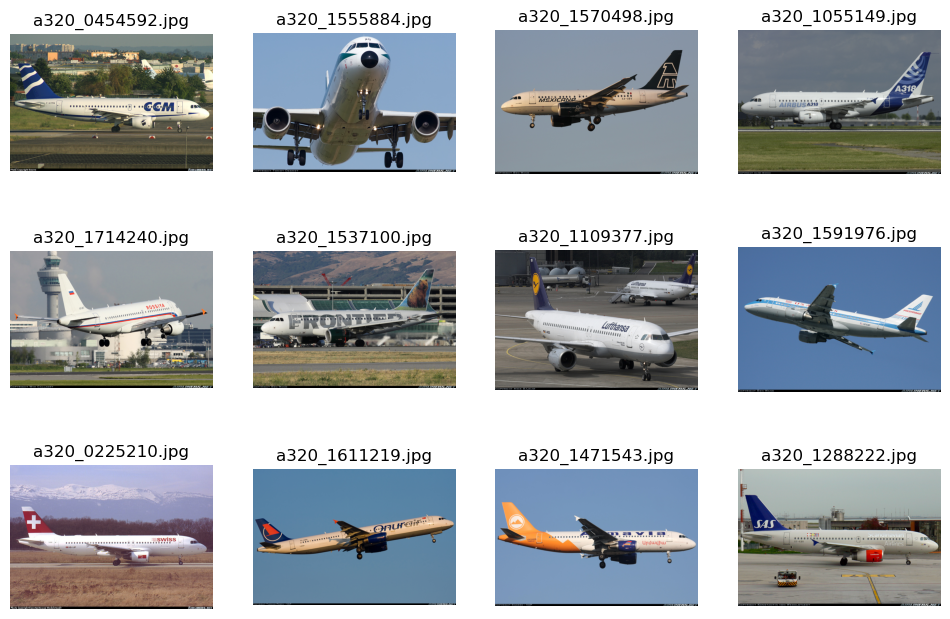

In [20]:
a_320_sample = np.random.choice(os.listdir(a_320_train_dir),size = 12)
plot_samples(a_320_train_dir, a_320_sample)

A 340

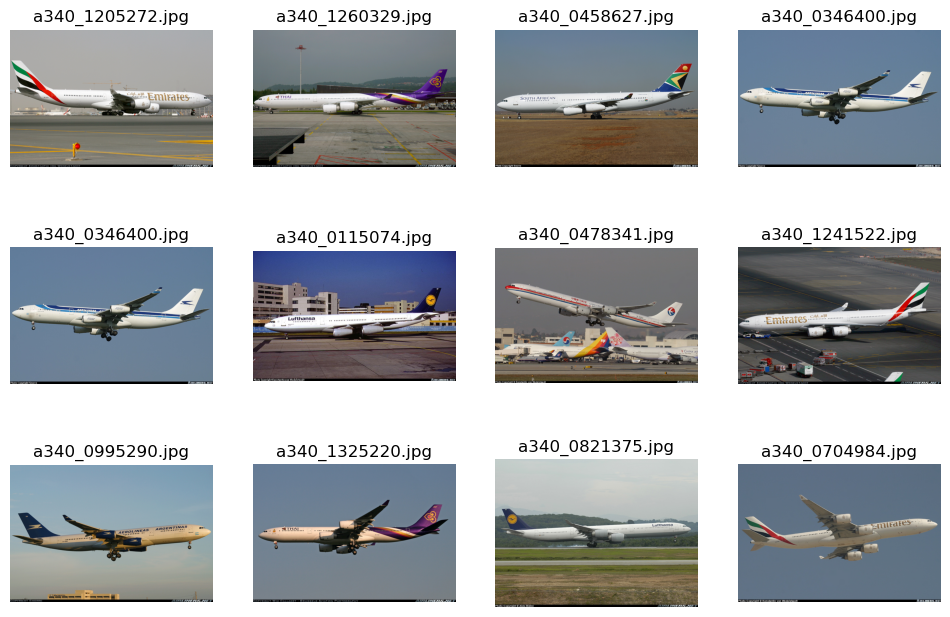

In [21]:
a_340_sample = np.random.choice(os.listdir(a_340_train_dir),size = 12)
plot_samples(a_340_train_dir, a_340_sample)

A 380

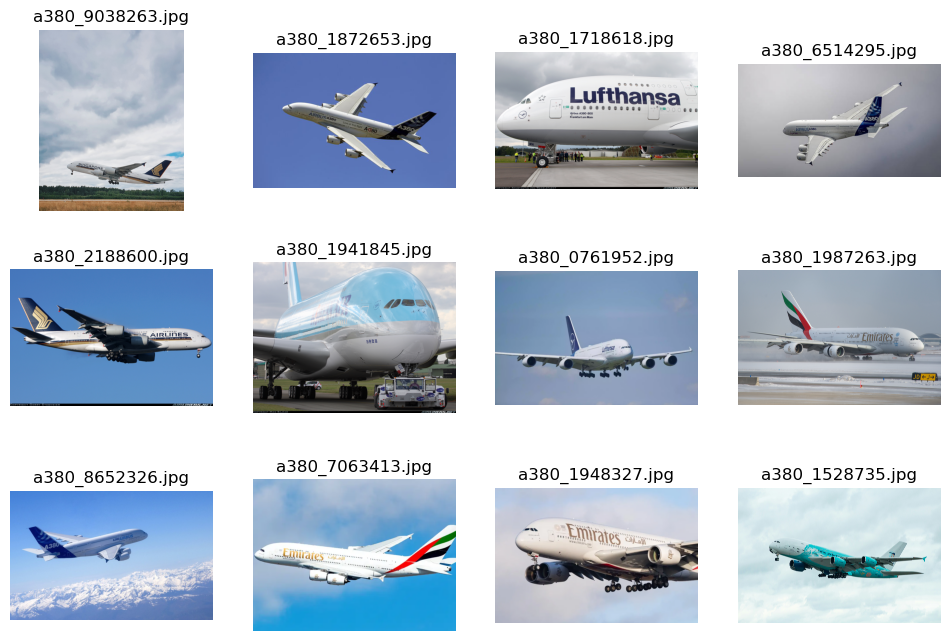

In [22]:
a_380_sample = np.random.choice(os.listdir(a_380_train_dir),size = 12)
plot_samples(a_380_train_dir, a_380_sample)

B 737

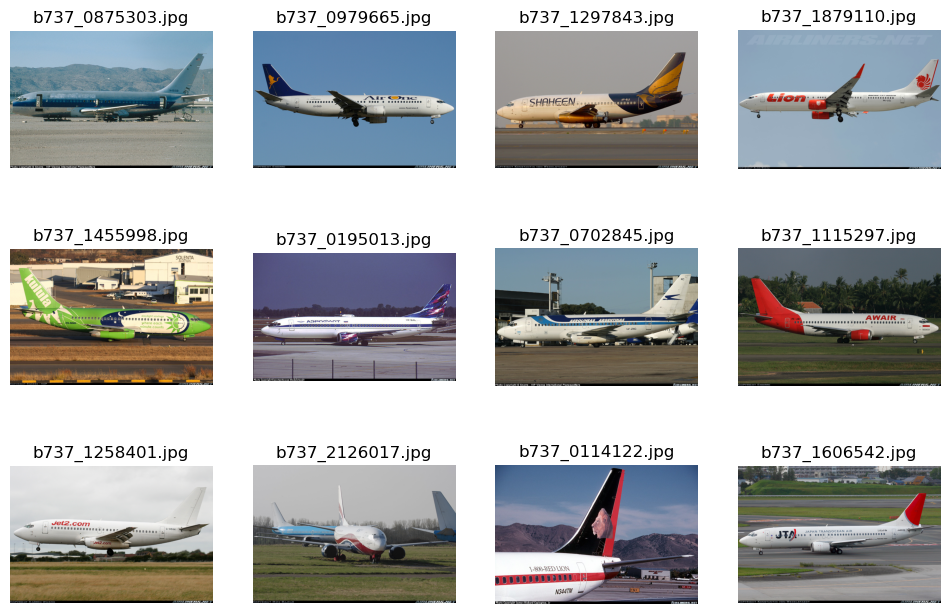

In [23]:
b_737_sample = np.random.choice(os.listdir(b_737_train_dir),size = 12)
plot_samples(b_737_train_dir, b_737_sample)

B 747

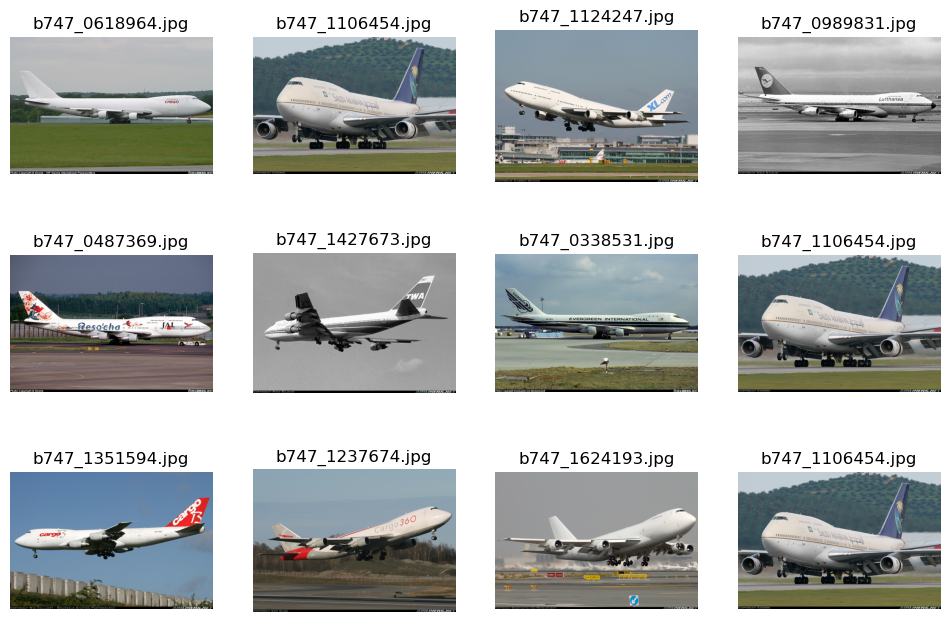

In [24]:
b_747_sample = np.random.choice(os.listdir(b_747_train_dir),size = 12)
plot_samples(b_747_train_dir, b_747_sample)

B 767

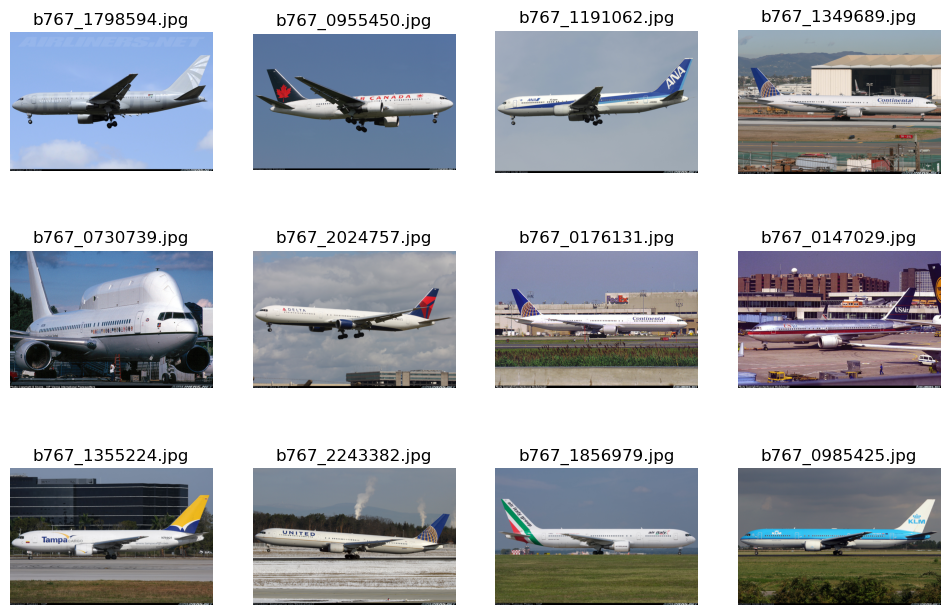

In [25]:
b_767_sample = np.random.choice(os.listdir(b_767_train_dir),size = 12)
plot_samples(b_767_train_dir, b_767_sample)

Embraer Ejet

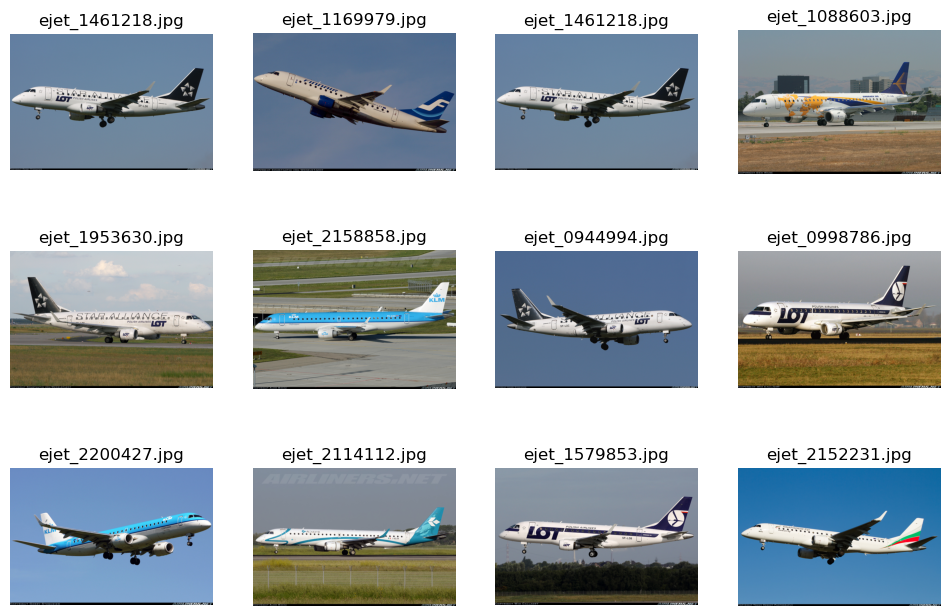

In [26]:
e_ejet_sample = np.random.choice(os.listdir(embraer_ejet_train_dir),size = 12)
plot_samples(embraer_ejet_train_dir, e_ejet_sample)

## Data augmentation to reduce overfitting

In [27]:

train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'sparse',
    color_mode = 'grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'sparse',
    color_mode = 'grayscale'
)

Found 690 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [28]:
test_generator.class_indices

{'Airbus_320': 0,
 'Airbus_340': 1,
 'Airbus_380': 2,
 'Boeing_737': 3,
 'Boeing_747': 4,
 'Boeing_767': 5,
 'Embraer_ejet': 6}

## Making the sequential model

In [29]:
input_shape = (150, 150, 1)
num_classes = 7  

model = Sequential([

    Conv2D(8, (3, 3), input_shape=input_shape, activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dropout(0.4),

    Dense(256, activation='relu'),
    BatchNormalization(),
    
    Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 8)         0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 74, 74, 8)         32        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 16)        0         
 g2D)                                                            
                                                        

## Compile the model

In [31]:
# Compile the model
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics = ['accuracy'])

## Early stopping callback()

In [36]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

## Learning rate scheduler callback()

In [37]:
def learning_rate_scheduler(epochs):

    if epochs < 10:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (10 - epochs))

In [38]:
learning_rate_schedule = LearningRateScheduler(learning_rate_scheduler)

## Fit the model

If ! train/test split already; Add validation_split=0.33 (For cross entropy validation: Alternatively choose samples between test and train split)

In [39]:
history = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 30,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks = [early_stopping, learning_rate_schedule]
)

Epoch 1/30
69/69 [==============================] - 38s 552ms/step - loss: 2.3306 - accuracy: 0.1667 - val_loss: 2.3908 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 2/30
69/69 [==============================] - 37s 534ms/step - loss: 2.2857 - accuracy: 0.1826 - val_loss: 2.3208 - val_accuracy: 0.1286 - lr: 0.0010
Epoch 3/30
69/69 [==============================] - 37s 536ms/step - loss: 2.1639 - accuracy: 0.1739 - val_loss: 3.2568 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 4/30
69/69 [==============================] - 37s 531ms/step - loss: 2.0290 - accuracy: 0.2203 - val_loss: 2.6869 - val_accuracy: 0.1286 - lr: 0.0010
Epoch 5/30
69/69 [==============================] - 37s 534ms/step - loss: 2.0601 - accuracy: 0.2232 - val_loss: 2.6385 - val_accuracy: 0.1286 - lr: 0.0010
Epoch 6/30
69/69 [==============================] - 37s 535ms/step - loss: 1.9826 - accuracy: 0.2058 - val_loss: 2.4643 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 7/30
69/69 [==============================] - 37s 533ms/st

In [71]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [40]:
acc = history.history['accuracy'][-1]

loss = history.history['loss'][-1]

epochs = len(history.history['accuracy'])
val_acc = history.history['val_accuracy'][-1]

print(f"accuracy: {acc}\nloss: {loss}")

accuracy: 0.30000001192092896
loss: 1.7753117084503174


## Check for overfitting

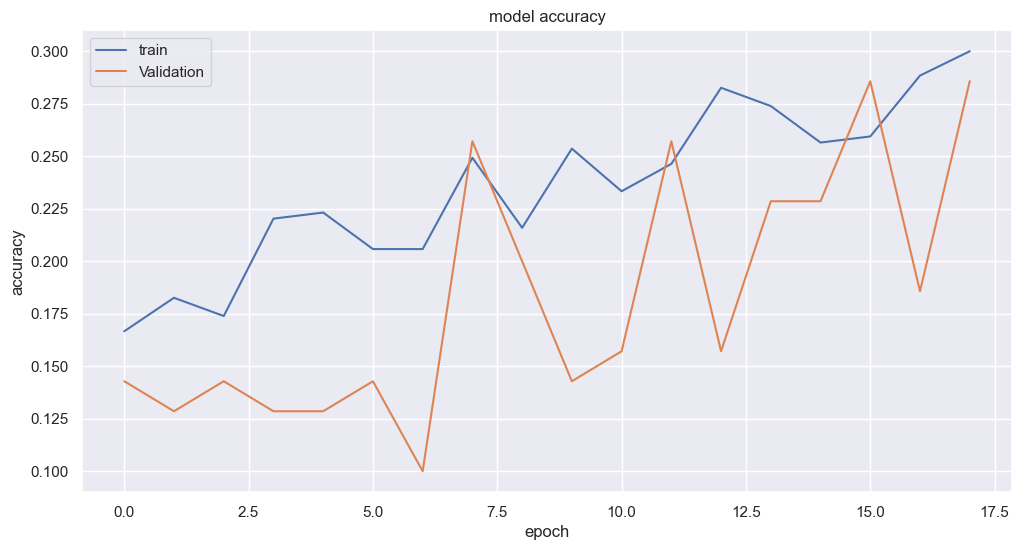

In [41]:
sns.set()
plt.figure(figsize = (12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

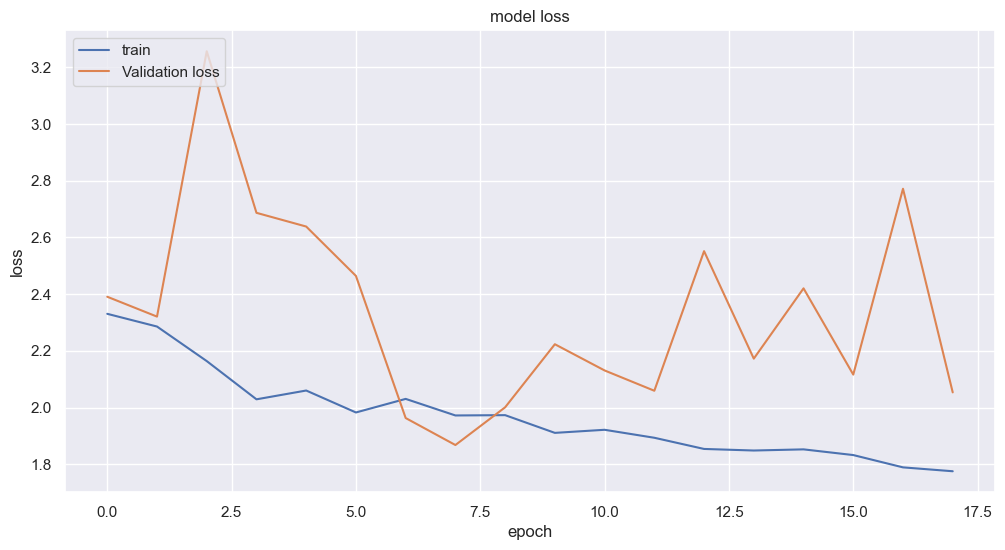

In [42]:
sns.set()
plt.figure(figsize = (12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation loss'], loc='upper left')
plt.show()

## Prédiction

In [66]:
classes = {
    0 : 'Airbus A 320',
    1 : 'Airbus A 340',
    2 : 'Airbus A 380',
    3 : 'Boeing 737',
    4 : 'Boeing 747',
    5 : 'Boeing 767',
    6 : 'Embraer E jet'
}

In [54]:
train_generator.class_indices

{'Airbus_320': 0,
 'Airbus_340': 1,
 'Airbus_380': 2,
 'Boeing_737': 3,
 'Boeing_747': 4,
 'Boeing_767': 5,
 'Embraer_ejet': 6}

In [43]:
def rgb_to_grayscale(path):

    rgb_image = Image.open(path)

    grayscale_image = rgb_image.convert('L')
    grayscale_image = np.array(grayscale_image)

    # Resize the NumPy array
    np_image = np.array(Image.fromarray(grayscale_image).resize((150, 150)))

    # Normalize the image
    np_image_nomalized = np_image / 255.0
    
    return np_image_nomalized

In [63]:
def predictions_test_set(path):

    files = os.listdir(path)

    for i, filename in enumerate(files):
        
        if filename != '.DS_Store':

            img = rgb_to_grayscale(path + '/' + filename)
            print(f"Image {filename}, predicted: {classes[np.argmax(model.predict(np.expand_dims(img, axis = 0)), axis = 1)[0]]}")

In [67]:
predictions_test_set(a_380_test_dir)

1/1 [==============================] - 0s 34ms/step
Image a380_9872518.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 31ms/step
Image a380_9716284.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 31ms/step
Image a380_1979068.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 36ms/step
Image a380_9861562.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 38ms/step
Image a380_9826128.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 29ms/step
Image a380_9817263.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 36ms/step
Image a380_9832618.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 34ms/step
Image a380_9732825.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 35ms/step
Image a380_9871652.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 34ms/step
Image a380_9865134.jpg, predicted: Airbus A 380


In [68]:
predictions_test_set(a_320_test_dir)

1/1 [==============================] - 0s 34ms/step
Image a320_2194912.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 32ms/step
Image a320_1838645.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 33ms/step
Image a320_1882508.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 33ms/step
Image a320_1921311.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 33ms/step
Image a320_2164953.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 32ms/step
Image a320_1878567.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 31ms/step
Image a320_1876402.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 29ms/step
Image a320_1871273.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 30ms/step
Image a320_1813838.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 30ms/step
Image a320_2069707.jpg, predicted: Airbus A 340


In [69]:
predictions_test_set(a_340_test_dir)

1/1 [==============================] - 0s 40ms/step
Image a340_1699455.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 39ms/step
Image a340_2130085.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 30ms/step
Image a340_2193516.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 31ms/step
Image a340_1794927.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 33ms/step
Image a340_2084805.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 36ms/step
Image a340_2215390.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 36ms/step
Image a340_2177828.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 40ms/step
Image a340_1718898.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 37ms/step
Image a340_1634020.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 35ms/step
Image a340_1732551.jpg, predicted: Airbus A 380


In [70]:
predictions_test_set(b_737_test_dir)

1/1 [==============================] - 0s 68ms/step
Image b737_1237623.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 32ms/step
Image b737_1163792.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 31ms/step
Image b737_0851302.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 29ms/step
Image b737_0558343.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 29ms/step
Image b737_1115400.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 30ms/step
Image b737_0237107.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 34ms/step
Image b737_0218042.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 37ms/step
Image b737_0973082.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 38ms/step
Image b737_0482804.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 38ms/step
Image b737_0523207.jpg, predicted: Airbus A 380


In [71]:
predictions_test_set(b_747_test_dir)

1/1 [==============================] - 0s 31ms/step
Image b747_1836113.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 37ms/step
Image b747_2162684.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 31ms/step
Image b747_1896036.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 30ms/step
Image b747_1707900.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 33ms/step
Image b747_2226313.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 37ms/step
Image b747_2167150.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 37ms/step
Image b747_1864991.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 36ms/step
Image b747_1739526.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 36ms/step
Image b747_2217964.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 39ms/step
Image b747_1821602.jpg, predicted: Airbus A 380


In [72]:
predictions_test_set(b_767_test_dir)

1/1 [==============================] - 0s 82ms/step
Image b767_0981955.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 31ms/step
Image b767_0905077.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 30ms/step
Image b767_0940358.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 30ms/step
Image b767_0097107.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 28ms/step
Image b767_0087248.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 31ms/step
Image b767_2054456.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 47ms/step
Image b767_2021838.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 43ms/step
Image b767_0867007.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 36ms/step
Image b767_2259027.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 35ms/step
Image b767_2209439.jpg, predicted: Airbus A 340


In [73]:
predictions_test_set(embraer_ejet_test_dir)

1/1 [==============================] - 0s 32ms/step
Image ejet_1912564.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 62ms/step
Image ejet_2156795.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 32ms/step
Image ejet_1917223.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 32ms/step
Image ejet_2259453.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 37ms/step
Image ejet_2094472.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 31ms/step
Image ejet_1398982.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 32ms/step
Image ejet_1367016.jpg, predicted: Airbus A 320
1/1 [==============================] - 0s 44ms/step
Image ejet_1687909.jpg, predicted: Airbus A 340
1/1 [==============================] - 0s 35ms/step
Image ejet_1796759.jpg, predicted: Boeing 767
1/1 [==============================] - 0s 38ms/step
Image ejet_1679201.jpg, predicted: Airbus A 320


In [1]:
plt.figure(figsize = (12,8))

for i in range(1, 7):

    ax = plt.subplot(3,3,i+1)
    x = image.img_to_array(T[i])
    x = x[np.newaxis]
    plt.axis("off")
    plt.imshow(T[i])
    result = model.predict(x)
    if result == 0 :
      ax.set_title("")
    else :
      ax.set_title("")

NameError: name 'plt' is not defined